# Superstore Sales Workflow Tutorial

This notebook walks through cleaning the Superstore dataset, designing a relational structure, creating an SQLite database, and running example SQL queries and visualizations.

In [8]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker


## 1️) Load and Inspect the Dataset

In [9]:
# reading error codes + research is how you can learn if there is different encoding, as seen below
df = pd.read_csv('../data/Superstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Double check some datatypes, and for nulls and duplicates:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

This data is incredibly clean - we can see there are no null values and no duplicates. However, there are some dates that could be saved in a better format.

## 2) Data Cleaning

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [14]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [15]:
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [16]:
df.rename(columns={"Segment":"customer_category"}, inplace=True)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,customer_category,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


With real data, it is very likely more cleaning and wrangling would be required. 

## 3) Build Relational Tables

In [ ]:
conn = sqlite3.connect('../data/superstore.db')

customers_df = df[['Customer ID','Customer Name','customer_category','City','State','Region']].drop_duplicates().rename(columns={
    'Customer ID':'customer_id',
    'Customer Name':'customer_name',
    'City':'city',
    'State':'state',
    'Region':'region',
})

products_df = df[['Product ID','Category','Sub-Category','Product Name']].drop_duplicates().rename(columns={
    'Product ID':'product_id',
    'Category':'category',
    'Sub-Category':'subcategory',
    'Product Name':'product_name'
})

orders_df = df[['Order ID','Order Date','Ship Date','Ship Mode','Customer ID']].drop_duplicates().rename(columns={
    'Order ID':'order_id',
    'Order Date':'order_date',
    'Ship Date':'ship_date',
    'Ship Mode':'ship_mode',
    'Customer ID':'customer_id'
})

order_details_df = df[['Order ID','Product ID','Sales','Quantity','Discount','Profit']].rename(columns={
    'Order ID':'order_id',
    'Product ID':'product_id'
})

customers_df.to_sql('customers', conn, index=False, if_exists='replace')
products_df.to_sql('products', conn, index=False, if_exists='replace')
orders_df.to_sql('orders', conn, index=False, if_exists='replace')
order_details_df.to_sql('order_details', conn, index=False, if_exists='replace')
conn.commit()

## 4) Make Some Queries!

### Which customer segments bring in the most revenue and profit?

In [27]:
query1 = """ SELECT 
    c.customer_category,
    ROUND(SUM(od.sales), 2) AS total_sales,
    ROUND(SUM(od.profit), 2) AS total_profit
FROM order_details od
JOIN orders o ON od.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY c.customer_category
ORDER BY total_sales DESC;
"""
result1 = pd.read_sql(query1, conn)
result1

,customer_category,total_sales,total_profit
0,Consumer,7954360.98,923657.52
1,Corporate,4768494.07,622614.73
2,Home Office,2808676.56,403920.45


### What are the top 10 customers by total sales?

In [31]:
query2 = """ SELECT c.customer_name, ROUND(SUM(od.sales), 2) AS total_sales FROM order_details od
    JOIN orders o ON o.order_id = od.order_id
    JOIN customers c ON o.customer_id = c.customer_id
    GROUP BY c.customer_id, c.customer_name
    ORDER BY total_sales DESC LIMIT 10;
    """
result2 = pd.read_sql(query2, conn)
result2

,customer_name,total_sales
0,Ken Lonsdale,141752.29
1,Sanjit Engle,134303.82
2,Adrian Barton,130262.14
3,Sean Miller,125215.25
4,Clay Ludtke,119686.01
5,Sanjit Chand,113138.67
6,Seth Vernon,103238.55
7,Zuschuss Carroll,96308.48
8,Maria Etezadi,95973.55
9,Laura Armstrong,95405.44


### Which product categories and subcategories are the most profitable overall?

In [35]:
query3 = """ SELECT p.category, p.subcategory, ROUND(SUM(od.profit), 2) AS profit FROM order_details od
    JOIN products p ON p.product_id = od.product_id
    GROUP BY p.category, p.subcategory
    ORDER BY profit DESC; 
"""
result3 = pd.read_sql(query3, conn)
result3

,category,subcategory,profit
0,Technology,Copiers,55617.82
1,Technology,Accessories,48359.05
2,Technology,Phones,46936.19
3,Office Supplies,Paper,36994.53
4,Office Supplies,Binders,30373.20
5,Furniture,Chairs,26707.65
6,Office Supplies,Storage,21408.70
7,Office Supplies,Appliances,18514.49
8,Furniture,Furnishings,14569.59
9,Office Supplies,Envelopes,6964.18


### What is the average discount given per category?

In [58]:
query4 = """ SELECT p.category, AVG(od.discount) AS avg_discount FROM products p
    JOIN order_details od ON od.product_id = p.product_id
    GROUP BY p.category;
"""
result4 = pd.read_sql(query4, conn)
result4

,category,avg_discount
0,Furniture,0.172514
1,Office Supplies,0.157000
2,Technology,0.132970


### Which states or regions contribute the most to total sales?

In [86]:
query5 = """ SELECT c.state AS state, ROUND(SUM(od.sales) ,2) AS total_sales FROM order_details od
    JOIN orders o ON o.order_id = od.order_id
    JOIN customers c ON c.customer_id = o.customer_id
    GROUP BY c.state
    ORDER BY total_sales DESC;
"""
result5 = pd.read_sql(query5, conn)
result5

,state,total_sales
0,California,2991943.64
1,New York,1572500.02
2,Texas,1495331.47
3,Pennsylvania,814279.89
4,Illinois,797721.17
5,Washington,783999.74
6,Ohio,707747.69
7,Florida,635637.78
8,North Carolina,437938.43
9,Michigan,432428.02


### How many orders were shipped late (where Ship Date > Order Date + 3 days)?

In [ ]:
query6 = """ SELECT COUNT(order_id) AS orders_shipped_late FROM (
    SELECT order_id, ship_date, DATE(order_date, '+3 day') AS new_date FROM orders)
    WHERE ship_date > new_date;
"""
result6 = pd.read_sql(query6, conn)
result6

,orders_shipped_late
0,3902


### Which month or year had the highest total sales?

In [84]:
query7 = """ SELECT strftime('%m %Y', o.order_date) AS month, SUM(od.quantity) AS total_sales FROM orders o 
    JOIN order_details od ON o.order_id = od.order_id
    GROUP BY month
    ORDER BY total_sales DESC;
"""
result7 = pd.read_sql(query7, conn)
result7

,month,total_sales
0,11 2014,1789
1,12 2014,1783
2,09 2014,1676
3,11 2013,1423
4,12 2013,1404
5,09 2013,1311
6,11 2012,1310
7,11 2011,1219
8,12 2012,1203
9,10 2014,1151


### What are the most frequently ordered products?

In [91]:
query8 = """ SELECT p.product_name AS product, COUNT(DISTINCT od.order_id) AS times_ordered FROM order_details od
    JOIN products p ON p.product_id = od.product_id
    GROUP BY p.product_name
    ORDER BY times_ordered DESC;
"""
result8 = pd.read_sql(query8, conn)
result8

,product,times_ordered
0,Staples,222
1,Avery Non-Stick Binders,20
2,Xerox 1908,18
3,Xerox 1881,18
4,Logitech P710e Mobile Speakerphone,18
...,...,...
1836,Avery 484,1
1837,Avaya IP Phone 1140E VoIP phone,1
1838,Acco Glide Clips,1
1839,AT&T EL51110 DECT,1


### Which customers placed more than 5 orders total?

In [102]:
query9 = """ SELECT customer, num_orders FROM (
    SELECT c.customer_name AS customer, COUNT(*) AS num_orders FROM customers c
    JOIN orders o ON o.customer_id = c.customer_id 
    GROUP BY c.customer_name
    HAVING count(*) > 5 )
    GROUP BY customer;
"""
result9 = pd.read_sql(query9, conn)
result9

,customer,num_orders
0,Aaron Bergman,9
1,Aaron Hawkins,42
2,Aaron Smayling,49
3,Adam Bellavance,64
4,Adam Hart,100
...,...,...
742,Xylona Preis,110
743,Yana Sorensen,64
744,Yoseph Carroll,25
745,Zuschuss Carroll,156


### What’s the profit margin (profit ÷ sales) by category or customer type?

In [ ]:
query10 = """ SELECT c.customer_category AS customer_type, SUM(od.profit / od.sales) AS profit_margin FROM customers c
    JOIN orders o ON c.customer_id = o.customer_id
    JOIN order_details od ON o.order_id = od.order_id
    GROUP BY c.customer_category
    ORDER BY c.customer_category;

"""
result10 = pd.read_sql(query10, conn)
result10

,customer_type,profit_margin
0,Consumer,3841.334641
1,Corporate,2516.808214
2,Home Office,1605.526696


### 5) Visualize it!

From your ten results, select at least 4 to utilize in a meaningful visualization. 

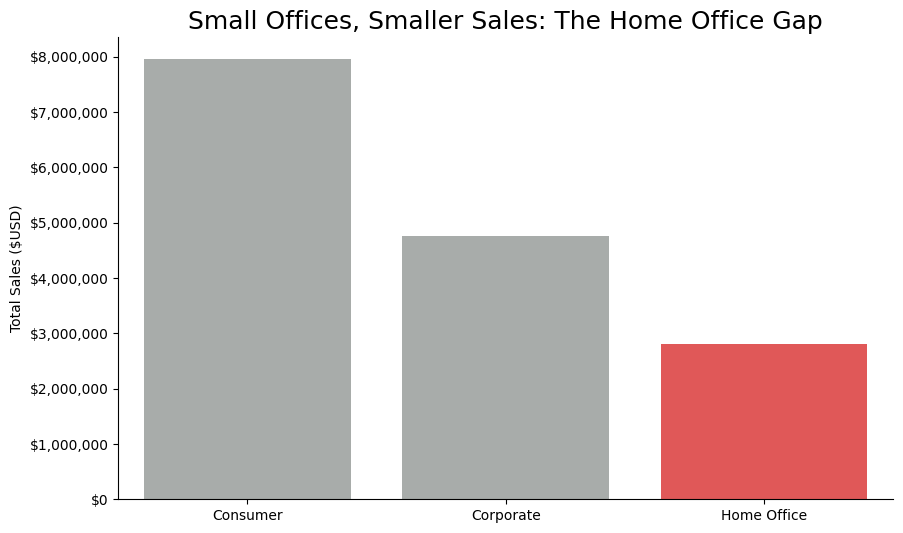

In [81]:
# example using result1
plt.figure(figsize=(10,6))
colors = ["#a7adaa", "#a7adaa", "#f74141" ]
sns.barplot(result1, x='customer_category', y='total_sales', palette=colors, hue='customer_category', legend=False)
plt.title('Small Offices, Smaller Sales: The Home Office Gap',fontsize=18)
plt.xlabel(None)
plt.ylabel('Total Sales ($USD)')

#for those wondering how to get rid of scientific notation! Set style to plain:
plt.ticklabel_format(style='plain', axis='y')

#mticker is a great library for helping tick mark formatting, such as adding commas and dollar signs in this case
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

#using the seaborn library, despining is way easier!
sns.despine()
plt.show()


In [ ]:
# visualization one code here

In [ ]:
# visualization two code here

In [ ]:
# visualization three code here

In [ ]:
# visualization four code here